Dynamic Programming
=======

# Theory
**Dynamic Programming (DP)** 

## Definition


### Algorithm


## Examples
### Production Planning Problem
Find optimal production schedule for filling an order at the specified delivery date at minimum cost
$$
\begin{aligned}
&\min \int_0^T (c_1 u^2 + c_2x) \;dt \\[5pt]
&\text{subject to} \qquad x^\prime = u, \quad x(0)=0, \quad x(T)=B
\end{aligned}
$$
where $u(t)$ is the production rate and x(t) is the current inventory at hand. 
This an optimal control problem with $u$ as control variable  and $x$ as state variable
$$\begin{aligned}\underline{\text{Solution}}&\end{aligned}$$
Using the Hamilton-Jacobi-Bellman equation, derived using principle of optimality
$$
\overbrace{-J_{t}(t,x,u)}^{\text{Value Function}}=\min_{u}\; [\;\overbrace{f( t,x,u)}^{(c_1 u^2 + c_2x)} + \overbrace{J_{x}( t,x)}^{\text{Value Function}} \overbrace{g( t,x,u)}^{x^\prime}\;] 
$$
$$
\begin{equation}
\Rightarrow -J_{t} = \min_{u}\; [\; (c_1 u^2 + c_2x) + J_{x}u\;] 
\end{equation}
$$

find optimal $u := u^\star$ for min by differentiating $\text{w.r.t }$ $u$
$$
\frac{\partial}{\partial u} [\; (c_1 u^2 + c_2x) + J_{x}u\;] = 0 \qquad \Rightarrow  u^\star = \frac{-J_x}{2c_1}
$$

substitute $u$ back to Hamilton-Jacobi-Bellman equation
$$
\begin{aligned}
-J_{t} &= \dfrac{1}{4c_1}J_{x}^{2}+c_{2}x  -\dfrac{J_x^{2}}{2c_{1}}\\[10pt]
\therefore\qquad 0 &= J_{t}+c_2x-\dfrac{J_x^{2}}{4c_1}
\end{aligned}
$$
This is pde is analytically solved using the following anzats $J(t,x) = a + bxt + hx^2/t + kt^3$, or numerically
<!-- This is pde is analytically solved using the following anzats $J(t,x) = a + bxt + hx^2/t + kt^3$, hence computing derivatives
$$
J_{t} = bx - hx^2/t^2 + 3kt^2,  \qquad\qquad\qquad J_{x} = bt + 2hx/t
$$
substitute $J_t \;\&\; J_x$ back 
$$
\begin{aligned}
0 &= bx - hx^2/t^2 + 3kt^2 + c_2x - \dfrac{(bt + 2hx/t)^{2}}{4c_1}\\[10pt]
\end{aligned}
$$ -->

# Implementation


## Imports

In [1]:
from sympy.solvers.pde import classify_pde, pdsolve
import sympy as sp
import matplotlib
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

## Algorithm


In [2]:
t, x = sp.symbols('t, x')
J = sp.Function('J')
J = J(t, x)
# eq = J.diff(t) + x - (J.diff(x))/(4)

eq = J.diff(t)*sp.exp(t) + x**2 + J.diff(x)**2*sp.exp(2*t)/4

print(pdsolve(eq, func=J))
# classify_pde(eq)

NotImplementedError: psolve: Cannot solve x**2 + exp(2*t)*Derivative(J(t, x), x)**2/4 + exp(t)*Derivative(J(t, x), t)

## Results Visualization & Behaver Analysis


In [ ]:
import numpy as np

# Define grid parameters
T = 1.0                 # Total time
dt = 0.01               # Time step
N = int(T / dt)         # Number of time steps

# Define State space
x_min, x_max = 0, 20  
dx = 0.1                
x_vals = np.arange(x_min, x_max + dx, dx)

# Define control space
u_min, u_max = -5, 5   
du = 0.1
u_vals = np.arange(u_min, u_max + du, du)

# Initialize value function V(x, t) on the grid
V = np.zeros((len(x_vals), N + 1))  # N+1 for the terminal condition

In [ ]:
# Running cost function L(x, u)
def running_cost(x, u):
    return 35*u**2 + 16*x  # Example: penalize both state and control

# State dynamics dx/dt = f(x, u)
def f(x, u):
    return u  # Simple dynamics: state increment by control


In [ ]:
# Value iteration to solve HJB equation
for t in reversed(range(N)):  # Iterate backwards in time
    for i, x in enumerate(x_vals):
        # Find optimal control by minimizing the value function update
        costs = []
        for u in u_vals:
            x_next = x + f(x, u) * dt
            if x_next < x_min or x_next > x_max:
                continue  # Skip controls that lead out of bounds

            # Find the index of x_next in the state grid
            i_next = int((x_next - x_min) / dx)
            
            # Calculate cost-to-go for this control
            immediate_cost = running_cost(x, u) * dt
            future_cost = V[i_next, t + 1]  # Value at the next time step
            costs.append(immediate_cost + future_cost)

        # Update V at (x, t) with the minimum cost-to-go for all controls
        V[i, t] = min(costs) if costs else V[i, t + 1]  # Ensure costs list is non-empty

In [ ]:
# Initialize a policy matrix for optimal controls
policy = np.zeros((len(x_vals), N))

for t in range(N):
    for i, x in enumerate(x_vals):
        best_u = u_vals[0]
        min_cost = float('inf')
        
        for u in u_vals:
            x_next = x + f(x, u) * dt
            if x_next < x_min or x_next > x_max:
                continue  # Skip controls that lead out of bounds

            i_next = int((x_next - x_min) / dx)
            cost = running_cost(x, u) * dt + V[i_next, t + 1]

            # Check if this control has a lower cost-to-go
            if cost < min_cost:
                min_cost = cost
                best_u = u
        
        # Store the optimal control at this state and time
        policy[i, t] = best_u

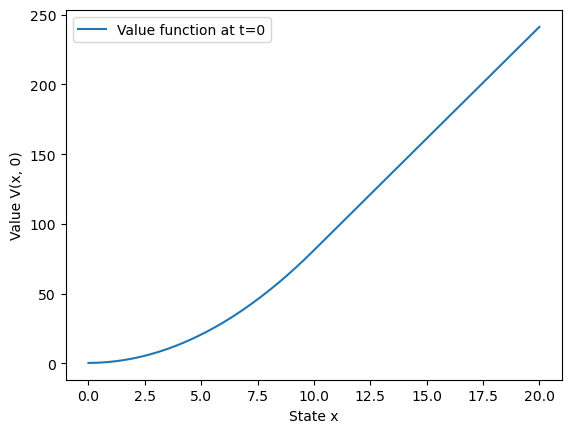

ValueError: x and y must have same first dimension, but have shapes (101,) and (201,)

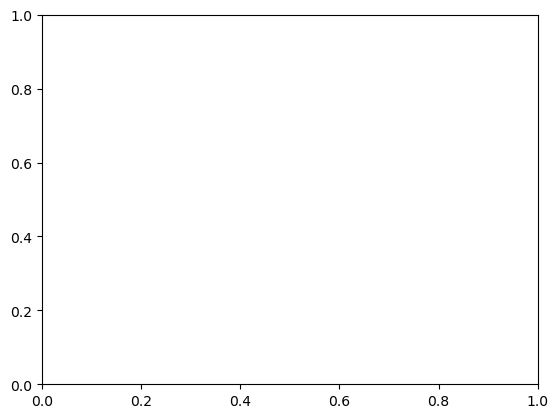

In [ ]:
import matplotlib.pyplot as plt

# Plot value function at initial time (t=0)
plt.plot(x_vals, V[:, 0], label="Value function at t=0")
plt.xlabel("State x")
plt.ylabel("Value V(x, 0)")
plt.legend()
plt.show()


time = np.arange(0, T + dt, dt)
# Plot value function at initial time (t=0)
plt.plot(time, x_vals, label="Value function at t=0")
plt.xlabel("State x")
plt.ylabel("Value V(x, 0)")
plt.legend()
plt.show()

# Plot the optimal policy at t=0
plt.plot(x_vals, policy[:, 0], label="Optimal policy at t=0")
plt.xlabel("State x")
plt.ylabel("Optimal control u")
plt.legend()
plt.show()

## Backward Recursion

In [ ]:
import networkx as nx
G = nx.Graph()

G.add_node("n")
# for i in range(4):
G.add_edge("n", "n1", weight=4)
G.add_edge("n", "n2", weight=2)
G.add_edge("n", "n3", weight=3)
G.add_edge("n", "n4", weight=4)

# nx.shortest_path(G, "A", "D", weight="weight")

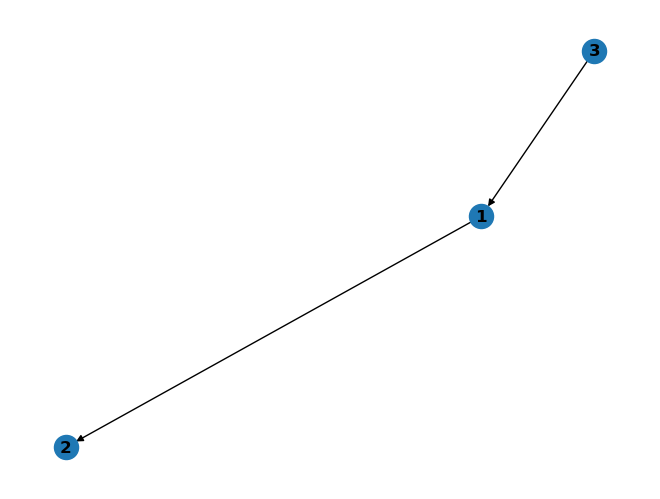

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

nx.draw(DG, with_labels=True, font_weight='bold')